In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#import datasets
dataset = pd.read_csv('suicide_rate.csv')
X = pd.DataFrame(dataset.iloc[:, 2:].values)
y = dataset.iloc[:, 1].values

,0,1,2,3,4
0,46.5,203.0,46.0,8.6,1288.8
1,46.6,255.0,75.0,8.7,1345.0
2,46.6,295.0,110.0,8.9,1369.8
3,46.7,150.0,162.0,8.6,1381.6
4,46.9,208.0,222.0,8.2,1416.1
5,47.1,255.0,292.0,8.1,1381.9
6,47.2,273.0,404.1,7.7,1464.8
7,47.3,346.0,743.0,8.1,1499.8
8,46.7,399.0,1020.2,7.1,1493.8
9,46.8,406.0,1471.3,7.8,1518.3


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(regressor.score(X_train, y_train), 
                                                                                    regressor.score(X_valid, y_valid)))

R^2 Training Score: 0.80 
R^2 Validation Score: 0.38


In [48]:
regressor.predict([[40,1000,9000,8,2900]])

array([2.0283075])

In [50]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [52]:
fe_imp = imp_df(X_train.columns, regressor.feature_importances_)
fe_imp

,feature,feature_importance
0,1,0.354438
1,0,0.207713
2,4,0.163493
3,2,0.143545
4,3,0.130811


In [53]:
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

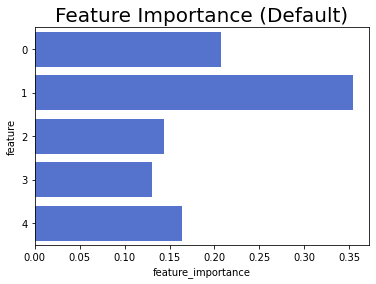

In [54]:
plot_imp = var_imp_plot(fe_imp, "Feature Importance (Default)")
plot_imp

In [14]:
x_axis_labels = ["Work_Hours","VA_Ex","Mob_Phone","CrudeMR","Employment","SuicideR"]

Text(0.5, 1.0, 'Correlation matrix')

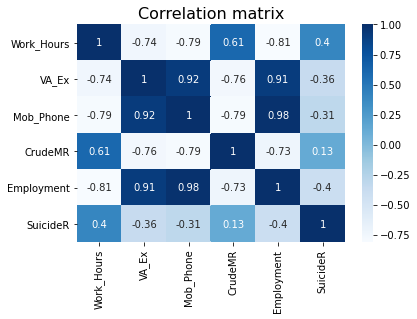

In [16]:
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Blues', annot = True, yticklabels=x_axis_labels,xticklabels=x_axis_labels).set_title('Correlation matrix', fontsize = 16)